In [11]:
import numpy as np
import tensorflow as tf

In [12]:
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [14]:
rand_b = np.random.uniform(0,100,(5,1)) #5 rows, 1 column
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [15]:
a = tf.placeholder(tf.float32)

In [16]:
b = tf.placeholder(tf.float32)

In [17]:
add_op = a + b

In [18]:
mul_op = a * b

In [25]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b}) #gives results of adding a and b together
    print(add_result)
    mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print('\n')
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Neural Network Example

In [26]:
n_features = 10 #our data has 10 features
n_dense_neurons = 3

In [31]:
x = tf.placeholder(tf.float32,(None,n_features)) #x's  # of columns must = W's # of rows in order to multiply

In [34]:
W = tf.Variable(tf.random_normal(shape=[n_features,n_dense_neurons]))
b = tf.Variable(tf.ones(shape=[n_dense_neurons]))

In [36]:
xW = tf.matmul(x,W)

In [37]:
z = tf.add(xW,b)

In [39]:
a = tf.sigmoid(z) #activation function

In [40]:
init = tf.global_variables_initializer()

In [42]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])}) #result of each neuron

In [44]:
print(layer_out) #all values are between 0 and 1 since we're using sigmoid

[[ 0.97885031  0.70564991  0.73738718]]


## Simple Regression Example

In [59]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)#10 linearly (evenly) spaced points between 0 and 10 + 10 uniform random dpoints between -1.5 and 1.5 (to add noise so data isn't perfectly straight line)

In [46]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [47]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [48]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

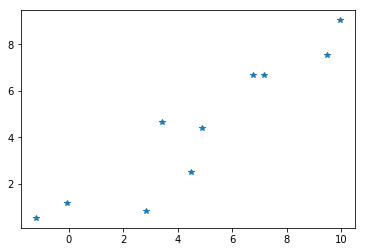

In [50]:
plt.plot(x_data,y_label,'*') # * makes the data represented by points

now that we have some noisy data, create the NN

y = mx + b

In [52]:
np.random.rand(2) #gives two random values

array([ 0.94926413,  0.47816742])

In [54]:
m = tf.Variable(0.94) #rounded random numbers previously created
b = tf.Variable(0.47)

In [56]:
error = 0
for x,y in zip(x_data,y_label): #zip makes a list of tuples
    y_hat = m*x + b #predicted value
    error += (y-y_hat)**2 #want to minimize error; this is the COST function

In [61]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) #if learning rate is too small, will take too long; if too long, inaccurate
train = optimizer.minimize(error)

In [58]:
init = tf.global_variables_initializer()

In [68]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100 #the more steps, the better m and b values the model will choose to fit a line to the data
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercept = sess.run([m,b])

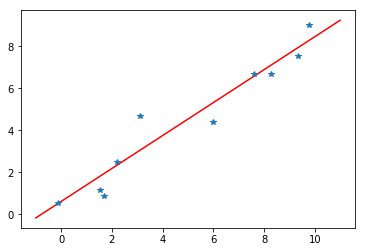

In [69]:
x_test = np.linspace(-1,11,10) #between -1 and 11, generate 10 points
y_pred_plot = final_slope * x_test + final_intercept # y = mx + b
plt.plot(x_test,y_pred_plot, 'r') #test data
plt.plot(x_data,y_label,'*') #real data